<a href="https://colab.research.google.com/github/Omid-Hassasfar/NITheCS_QSouthAfrica_MiniSchool_Introduction_to_Quantum_Computing_with_PennyLane/blob/main/NITheCS_QSouthAfrica_Mini_School_Introduction_to_Quantum_Computing_with_PennyLane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Previous NITheCS/NITheP Schools on Quantum Computing

1. Quantum Computing
NITheP Mini-School by Dr Daniel Park (2020)   
https://www.youtube.com/playlist?list=PLE9Qrf4CJnRGjWfSZ96cSjvm8t0IT1BFa   
<br>

2. Basic programming for quantum machine learning with Qiskit and PennyLane NITheP Mini-School by Amira Abbas (2020)   
https://www.youtube.com/playlist?list=PLE9Qrf4CJnRHQ8K_WKcuE4mNoXl2HgY-r
<br>

3. A Practical Introduction to Quantum Computing with Qiskit NITheCS Mini-School by Ian Joel David (2022)  
https://www.youtube.com/playlist?list=PLE9Qrf4CJnREpevvYhvjqCwO-f1qvRA8s   
<br>

4. An Introduction to the Quantum Simulation of Closed and Open Quantum Systems - NITheCS Mini-School by Ian Joel David (2024)
https://www.youtube.com/playlist?list=PLE9Qrf4CJnREqZPZih2I24Q0IQhNrAZFO   
<br>

5. Mini-school From Electrons to Qubits: (Quantum Computing for Chemistry) NITheCS Mini-School by Shane McFarthing. (2024)   
https://www.youtube.com/playlist?list=PLE9Qrf4CJnRGVPbcdw9ZHWYmCxRA7I0Be  
<br>

6. Hands-On Introduction to Quantum Computing with PennyLane - NITheCS Mini-school by Abbas (Omid) Hassasfar (2025)
https://www.youtube.com/playlist?list=PLE9Qrf4CJnRFP8NedllrSPu-9KoyrdLi-

## Previous QSouthAfrica/QAfrica workshops on Quantum Computing

https://qworld.net/qsouthafrica/

https://www.linkedin.com/company/qsouthafrica
<br><br>


1. QBronze109 (Entangling event) : https://qworld.net/qbronze109/  (July 2023)   
<br>
2. QNickel9 (organized by QCousins of QTurkey, QIran, QSouthAfrica, and QUAE is a collective quantum workshop): https://qworld.net/qnickel9/ (December 2023)        
<br>
3. QPrep16, **QAfrica**: nine African QCousins – QSouthAfrica, QLibya, QNigeria, QCameroon, QAlgeria, QEgypt, QMorocco, QZimbabwe and QGhana ) :   https://qworld.net/qprep16/   (November 2024)    
<br>
4. QBronze147, **QAfrica** (nine African QCousins – QSouthAfrica, QLibya, QNigeria, QCameroon, QAlgeria, QEgypt, QMorocco, QZimbabwe and QGhana )  : https://qworld.net/qbronze147/ (December 2024)        
<br>

5. First QWorld Annual Meeting! January 2025 : https://qworld.net/qworld-annual-meeting/

## Quantum Computing Resource & Syllabus Mind Maps:

‌ https://www.linkedin.com/feed/update/urn:li:activity:7357912387263299584/

In [289]:
# Show all installed Python packages in the current Google Colab environment

# !pip list

## 📦 Installing and importing

In [290]:
!pip install pennylane --quiet

In [291]:
# Check pennylane version

import pennylane as qml
from pennylane import draw_mpl

print("Pennylane version:", qml.__version__)

Pennylane version: 0.42.3


In [292]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib
import scipy as sp
import sympy as sy

print("Python version:", sys.version)
print("Numpy version:", np.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Sympy version:", sy.__version__)
print("SciPy version:", sp.__version__)

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Numpy version: 2.0.2
Matplotlib version: 3.10.0
Sympy version: 1.13.3
SciPy version: 1.16.1


## Real Quantum Computers (QPUs) providers:

https://aws.amazon.com/braket/quantum-computers/

https://learn.microsoft.com/en-us/azure/quantum/qc-target-list

https://forge.qcware.com/ & https://forge.qcware.com/pricing/

https://quantum.cloud.ibm.com/computers

https://www.xanadu.ai/products/x-series

https://www.dwavequantum.com/solutions-and-products/systems/

https://www.quantinuum.com/products-solutions/quantinuum-systems
---
---
**Devices and Quantum hardware PennyLane supports a wide range of quantum simulators and hardware devices**:   
https://pennylane.ai/install

## I created some functions that are not built-in in PennyLane


In [293]:
# This function is a quantum state pretty-printer that takes a state vector psi and displays
# it in Dirac (ket) notation.

def print_state_ket(psi, num_wires=None, precision=3, threshold=1e-10):
    """
    Prints a quantum state vector in Dirac (ket) notation, showing each basis state's complex amplitude.

    Args:
        psi (array-like): State vector as a list or NumPy array of complex amplitudes.
        num_wires (int or None): Number of qubits. If None, it is inferred from len(psi).
        precision (int): Number of decimal places for real and imaginary parts.
        threshold (float): Amplitudes with magnitude below this are omitted from the output.
    """
    import numpy as np

    psi = np.asarray(psi)
    if num_wires is None:
        num_wires = int(np.log2(len(psi)))
        if 2 ** num_wires != len(psi):
            raise ValueError("State length is not a power of 2. Cannot infer number of wires.")

    basis_states = [f"|{i:0{num_wires}b}⟩" for i in range(2 ** num_wires)]
    terms = [
        f"({amp.real:+.{precision}f}{amp.imag:+.{precision}f}j){ket}"
        for amp, ket in zip(psi, basis_states)
        if abs(amp) > threshold
    ]
    state_str = " +\n    ".join(terms) if terms else "0"
    print(f"|ψ⟩ = {state_str}")

In [294]:
# Plots a histogram using Matplotlib

def plot_probabilities(probs, n_bits, title=None):
    """Plot probabilities with ket notation on x-axis.

    Args:
        probs (array-like): Probability distribution (length 2**n_bits).
        n_bits (int): Number of qubits.
        title (str, optional): Custom plot title. If None, a default is used.
    """
    # Generate ket-notation labels
    basis_states = [f"|{i:0{n_bits}b}⟩" for i in range(2**n_bits)]

    # Plot histogram
    plt.figure(figsize=(12,6))  # wider figure
    plt.bar(basis_states, probs, color="steelblue", edgecolor="black")
    plt.xlabel("Basis state (ket)")
    plt.ylabel("Probability")
    if title:
        plt.title(title)
    else:
        plt.title(f"Probability Distribution for {n_bits}-qubit system")
    plt.xticks(rotation=45, ha="right")  # angled labels for readability
    plt.tight_layout()
    plt.show()

## Resources for this mini-school:

https://pennylane.ai/codebook/learning-paths/foundations-of-quantum-computing

https://pennylane.ai/codebook/pennylane-fundamentals


Several styles for drawings qml.drawer: https://docs.pennylane.ai/en/stable/code/qml_drawer.html

Bloch Sphere: https://pennylane.ai/codebook/single-qubit-gates/from-a-different-angle

<br>

https://en.wikipedia.org/wiki/Complex_number     
https://en.wikipedia.org/wiki/Logic_gate      
https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Matrix_examples
https://en.wikipedia.org/wiki/Expectation_value_(quantum_mechanics)

## Codercise I.1.5 — A simple quantum algorithm

In [295]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def initialize_state():
    """Prepare a qubit in state |0>.

    Returns:
        np.array[float]: the vector representation of state |0>.
    """

    # PREPARE THE STATE |0>
    return np.array([1, 0])

def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)

def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome

def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.

    Try and do so using three lines of code or less!

    Returns:
        np.array[int]: the measurement results after running the algorithm 100 times
    """

    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    state = initialize_state()
    state = apply_u(state)
    return measure_state(state, 1000)

In [296]:
print(quantum_algorithm())

[0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0
 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1
 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0
 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1
 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1
 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1
 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1
 0 0 0 0 1 0 1 0 0 1 0 0 

In [297]:
import collections
results = quantum_algorithm()
collections.Counter(results)

Counter({np.int64(1): 492, np.int64(0): 508})

In [298]:
counts = collections.Counter(results)

# Calculate percentages
total = sum(counts.values())
percentages = {k: (v / total) * 100 for k, v in counts.items()}

# Display results
print("Counts:", counts)
print("Percentages:", {k: f"{v:.2f}%" for k, v in percentages.items()})

Counts: Counter({np.int64(0): 508, np.int64(1): 492})
Percentages: {np.int64(1): '49.20%', np.int64(0): '50.80%'}


Counts: Counter({np.int64(1): 541, np.int64(0): 459})
Percentages: {np.int64(1): '54.10%', np.int64(0): '45.90%'}


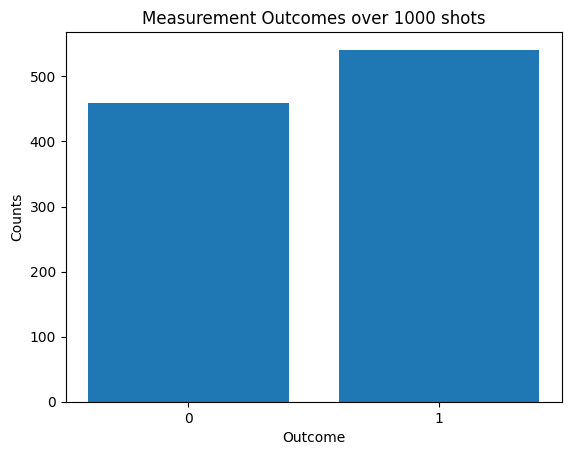

In [299]:
# Plot Histogram

# Define Hadamard gate
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def initialize_state():
    """Prepare a qubit in state |0>."""
    return np.array([1, 0])

def apply_u(state):
    """Apply the Hadamard gate."""
    return np.dot(U, state)

def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    return np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)

def quantum_algorithm(num_shots=100):
    """Prepare |0>, apply H, then measure num_shots times."""
    state = initialize_state()
    state = apply_u(state)
    return measure_state(state, num_shots)

# ---- Run and analyze ----
num_shots = 1000  # increase for smoother histogram
results = quantum_algorithm(num_shots)

# Count occurrences
counts = collections.Counter(results)

# Calculate percentages
total = sum(counts.values())
percentages = {k: (v / total) * 100 for k, v in counts.items()}

# Print results
print("Counts:", counts)
print("Percentages:", {k: f"{v:.2f}%" for k, v in percentages.items()})

# Plot counts histogram
labels = sorted(counts.keys())
values = [counts[k] for k in labels]
plt.bar(labels, values)
plt.title(f"Measurement Outcomes over {num_shots} shots")
plt.xlabel("Outcome")
plt.ylabel("Counts")
plt.xticks(labels)
plt.show()

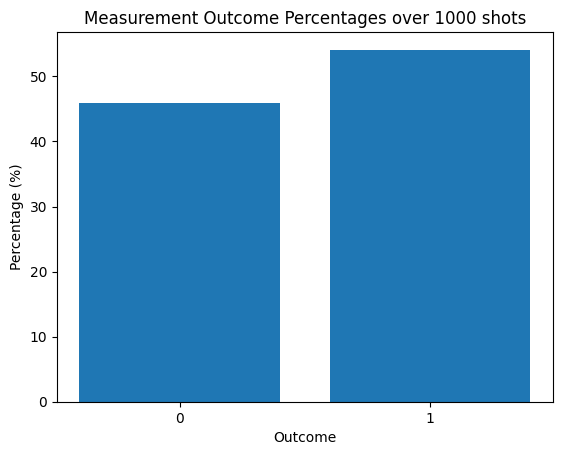

In [300]:
# Plot percentage histogram
plt.bar(labels, [percentages[k] for k in labels])
plt.title(f"Measurement Outcome Percentages over {num_shots} shots")
plt.xlabel("Outcome")
plt.ylabel("Percentage (%)")
plt.xticks(labels)
plt.show()

## Most common ***Single-Qubit Gates & Multi-Qubit Gates + PennyLane measurements cheat sheet***.
Tables as a reference!: (PennyLane includes a wide array of built-in gates to use):

https://pennylane.ai/codebook/single-qubit-gates/prepare-yourself

https://pennylane.ai/codebook/circuits-with-many-qubits/multi-qubit-challenge

https://pennylane.ai/codebook/pennylane-fundamentals/quantum-operations

https://pennylane.ai/codebook/pennylane-fundamentals/measurements-in-pennylane

## Codercise I.2.3 — The QNode decorator

In [301]:
dev = qml.device("default.qubit", wires=3)

# decorate the function to turn it into a QNode
@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.Barrier(wires=[0, 1, 2])  # The Barrier operator, used to separate the compilation process into blocks or as a visual tool.
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    qml.Barrier(wires=[0, 1, 2])
    return qml.probs(wires=[0, 1, 2])

# given parameters
theta, phi, omega = 0.1, 0.2, 0.3

In [302]:
# run the QNode
# We have 3 qubits → 8 possible measurement outcomes:
print(my_circuit(theta, phi, omega))

[9.87560268e-01 0.00000000e+00 0.00000000e+00 2.47302134e-03
 2.48960206e-05 0.00000000e+00 0.00000000e+00 9.94181506e-03]


In [303]:
sy.Matrix(my_circuit(theta, phi, omega))

Matrix([
[  0.987560267580271],
[                0.0],
[                0.0],
[0.00247302134034999],
[2.48960206371239e-5],
[                0.0],
[                0.0],
[0.00994181505874206]])

In [304]:
# run the QNode
probs = my_circuit(theta, phi, omega)
print()
# check that they sum to 1
print("Probabilities:", probs)
print()
print("Sum of probabilities:", sum(probs))
print()
print("Sum of probabilities:", round(sum(probs), 7))


Probabilities: [9.87560268e-01 0.00000000e+00 0.00000000e+00 2.47302134e-03
 2.48960206e-05 0.00000000e+00 0.00000000e+00 9.94181506e-03]

Sum of probabilities: 0.9999999999999999

Sum of probabilities: 1.0


In [305]:
print(qml.draw(my_circuit)(theta, phi, omega))

0: ──RX(0.10)─╭||─╭●────╭X─╭||─┤ ╭Probs
1: ──RY(0.20)─├||─╰X─╭●─│──├||─┤ ├Probs
2: ──RZ(0.30)─╰||────╰X─╰●─╰||─┤ ╰Probs


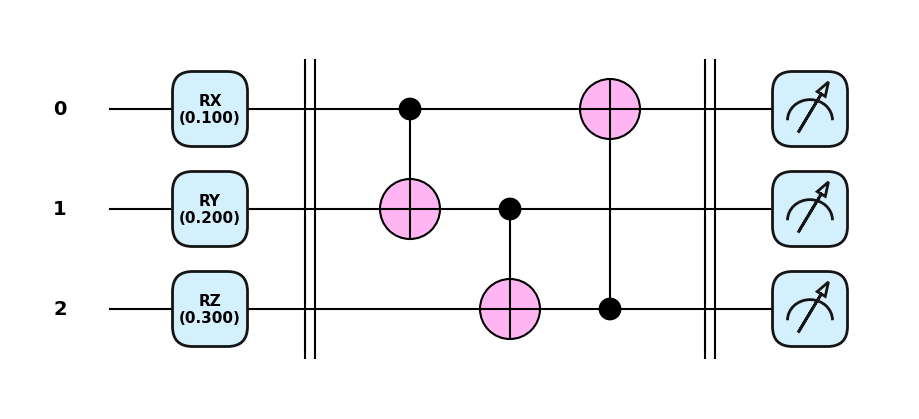

In [306]:
fig, ax = qml.draw_mpl(my_circuit, decimals=3, style="pennylane")(theta, phi, omega)
plt.show()

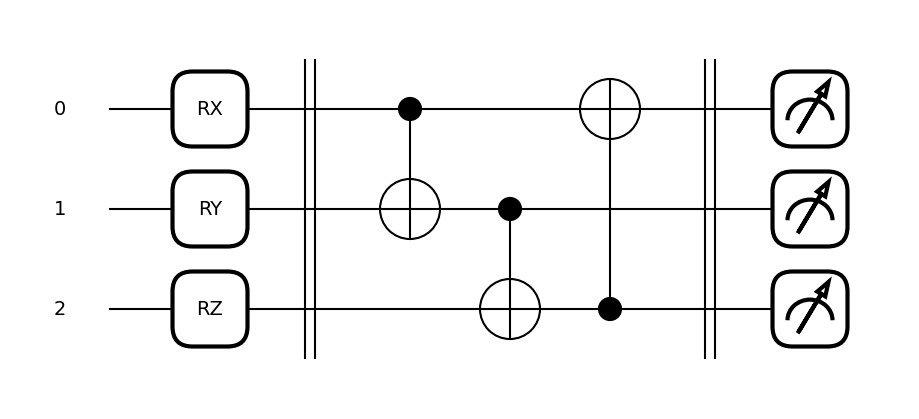

In [307]:
draw_mpl(my_circuit)(theta, phi, omega);

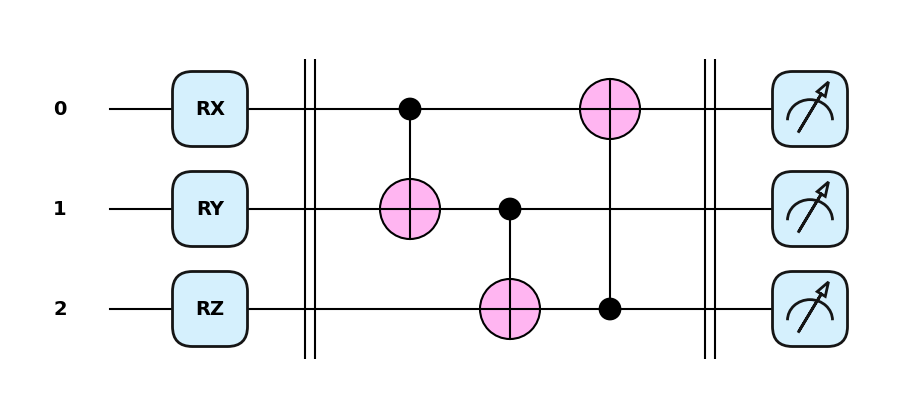

In [308]:
draw_mpl(my_circuit , style="pennylane" )(theta, phi, omega);

## Codercise I.3.1 — Unitaries in PennyLane

In [309]:
# Applies a custom ** unitary matrix ** to specified qubit wires.

dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def apply_u():

    # USE QubitUnitary TO APPLY U TO THE QUBIT
    qml.QubitUnitary(U, wires=0)

    # Return the state
    return qml.state()

In [310]:
apply_u()

array([0.70710678+0.j, 0.70710678+0.j])

In [311]:
sy.Matrix(apply_u())

Matrix([
[0.707106781186547],
[0.707106781186547]])

In [312]:
# let's check if U is unitary or not!

U

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [313]:
U.conj().T

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [314]:
U @ U.conj().T

array([[ 1.00000000e+00, -2.23711432e-17],
       [-2.23711432e-17,  1.00000000e+00]])

In [315]:
np.round(U @ U.conj().T, 10)

array([[ 1., -0.],
       [-0.,  1.]])

## Codercise I.14.1 — The Bell states

https://pennylane.ai/codebook/circuits-with-many-qubits/multi-qubit-challenge

In [316]:
dev = qml.device("default.qubit", wires=2)

# Starting from |00>, construct each Bell state.

@qml.qnode(dev)
def prepare_psi_plus():
    # PREPARE (1/sqrt(2)) (|00> + |11>)  ≡ |Φ+>
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

@qml.qnode(dev)
def prepare_psi_minus():
    # PREPARE (1/sqrt(2)) (|00> - |11>)  ≡ |Φ->
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliZ(wires=0)
    return qml.state()

@qml.qnode(dev)
def prepare_phi_plus():
    # PREPARE (1/sqrt(2)) (|01> + |10>)  ≡ |Ψ+>
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliX(wires=0)
    return qml.state()

@qml.qnode(dev)
def prepare_phi_minus():
    # PREPARE (1/sqrt(2)) (|01> - |10>)  ≡ |Ψ->
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.PauliX(wires=0)
    qml.PauliZ(wires=0)
    return qml.state()

psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()

# Uncomment to print results
print(f"|ψ_+> = {psi_plus}", '\n')
print_state_ket (psi_plus)
print()
print(f"|ψ_-> = {psi_minus}" , '\n')
print_state_ket (psi_minus)
print()
print(f"|ϕ_+> = {phi_plus}", '\n')
print_state_ket (phi_plus)
print()
print(f"|ϕ_-> = {phi_minus}", '\n')
print_state_ket (phi_minus)

|ψ_+> = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j] 

|ψ⟩ = (+0.707+0.000j)|00⟩ +
    (+0.707+0.000j)|11⟩

|ψ_-> = [ 0.70710678+0.j  0.        +0.j -0.        +0.j -0.70710678+0.j] 

|ψ⟩ = (+0.707+0.000j)|00⟩ +
    (-0.707+0.000j)|11⟩

|ϕ_+> = [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j] 

|ψ⟩ = (+0.707+0.000j)|01⟩ +
    (+0.707+0.000j)|10⟩

|ϕ_-> = [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j -0.        +0.j] 

|ψ⟩ = (+0.707+0.000j)|01⟩ +
    (-0.707+0.000j)|10⟩


## a simple example of Dirac (ket) notation representation of the state

First Example:

In [317]:
dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def my_state_ket():
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    qml.Hadamard(wires = 2)

    return qml.state()

In [318]:
state = my_state_ket()

In [319]:
print("My State vector is:", state)

My State vector is: [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


In [320]:
sy.Matrix(state)

Matrix([
[0.353553390593274],
[0.353553390593274],
[0.353553390593274],
[0.353553390593274],
[0.353553390593274],
[0.353553390593274],
[0.353553390593274],
[0.353553390593274]])

In [321]:
print_state_ket(state)

|ψ⟩ = (+0.354+0.000j)|000⟩ +
    (+0.354+0.000j)|001⟩ +
    (+0.354+0.000j)|010⟩ +
    (+0.354+0.000j)|011⟩ +
    (+0.354+0.000j)|100⟩ +
    (+0.354+0.000j)|101⟩ +
    (+0.354+0.000j)|110⟩ +
    (+0.354+0.000j)|111⟩


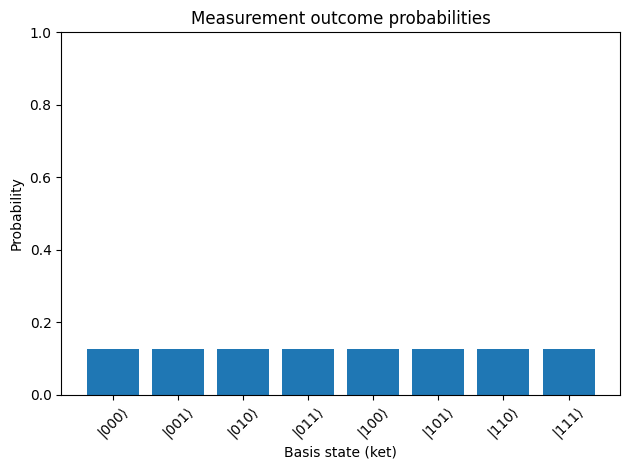

In [322]:
# infer number of qubits and make |...⟩ labels
num_wires = int(np.log2(len(state)))
labels = [f"|{i:0{num_wires}b}⟩" for i in range(2**num_wires)]

# probabilities
probs = np.abs(state)**2

# bar chart with ket notation on x-axis
plt.bar(labels, probs)
plt.xlabel("Basis state (ket)")
plt.ylabel("Probability")
plt.title("Measurement outcome probabilities")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # optional
plt.tight_layout()
plt.show()

---
---

##Second example: The famous GHZ (Greenberger–Horne–Zeilinger) state
https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state

GHZ State Derivation for `H(0) → CNOT(0→1) → CNOT(1→2)`

We label qubits by wire index and write basis states as $|q_0\,q_1\,q_2\rangle$.  
Initial state (PennyLane default): $|\psi_0\rangle = |000\rangle$.

---

### 1) Apply $H$ on wire 0
Using $H|0\rangle = \frac{|0\rangle+|1\rangle}{\sqrt{2}}$,

$$
|\psi_1\rangle
= \left(\frac{|0\rangle_0 + |1\rangle_0}{\sqrt{2}}\right)|0\rangle_1|0\rangle_2
= \frac{|000\rangle + |100\rangle}{\sqrt{2}}.
$$

---

### 2) Apply $\mathrm{CNOT}(0\!\to\!1)$
Control $q_0$, target $q_1$. Flip $q_1$ iff $q_0=1$:

$$
|000\rangle \mapsto |000\rangle, \quad
|100\rangle \mapsto |110\rangle.
$$

So,
$$
|\psi_2\rangle = \frac{|000\rangle + |110\rangle}{\sqrt{2}}.
$$

---

### 3) Apply $\mathrm{CNOT}(1\!\to\!2)$
Control $q_1$, target $q_2$. Flip $q_2$ iff $q_1=1$:

$$
|000\rangle \mapsto |000\rangle \quad (q_1=0),
\quad
|110\rangle \mapsto |111\rangle \quad (q_1=1).
$$

Thus,
$$
|\psi_{\text{final}}\rangle = \frac{|000\rangle + |111\rangle}{\sqrt{2}}.
$$

---

### Result (GHZ State)

$$
|\mathrm{GHZ}_3\rangle = \frac{|000\rangle + |111\rangle}{\sqrt{2}}
$$

In [323]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def my_state_ket_2():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])

    # Return both probabilities and state
    return qml.probs(wires=range(3)), qml.state()

# Run the circuit
probs, state = my_state_ket_2()

print("State vector:", state)
print()
print("Probabilities:", probs)

State vector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

Probabilities: [0.5 0.  0.  0.  0.  0.  0.  0.5]


In [324]:
dev = qml.device("default.qubit", wires = 3)

@qml.qnode(dev)
def my_state_ket_2():
    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0, 1])
    qml.CNOT(wires = [1, 2])

    return qml.state()

In [325]:
state2 = my_state_ket_2()    # Complex amplitudes
print("My State vector is:", state2)

My State vector is: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [326]:
print_state_ket(state2)

|ψ⟩ = (+0.707+0.000j)|000⟩ +
    (+0.707+0.000j)|111⟩


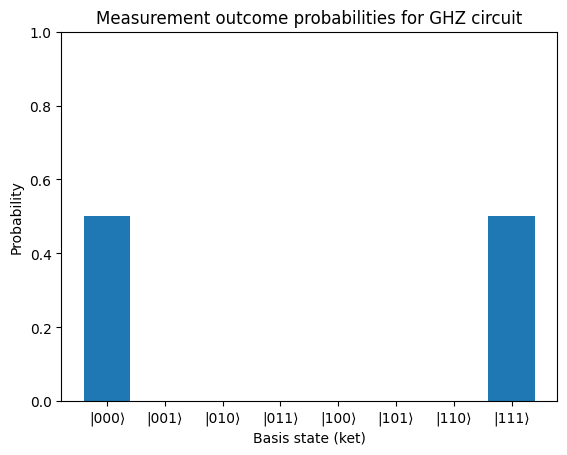

In [327]:
# Number of qubits and ket labels
num_wires = int(np.log2(len(state2)))
labels = [f"|{i:0{num_wires}b}⟩" for i in range(2**num_wires)]

# Compute probabilities
probs = np.abs(state2)**2

# Plot histogram
plt.bar(labels, probs)
plt.xlabel("Basis state (ket)")
plt.ylabel("Probability")
plt.title("Measurement outcome probabilities for GHZ circuit")
plt.ylim(0, 1)
plt.show()

## Codercise A.1.1 — Create a uniform superposition

In [328]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def naive_circuit():
    """Create a uniform superposition and return the probabilities.

    Returns:
        array[float]: Probabilities for observing different outcomes.
    """
    for wire in range(n_bits):
        qml.Hadamard(wires=wire)   # Apply Hadamard to each qubit

    return qml.probs(wires=range(n_bits))

In [329]:
# Run the circuit
probs = naive_circuit()
print(probs)

[0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625]


In [330]:
@qml.qnode(dev)
def naive_circuit_state():
    """Create a uniform superposition and return the probabilities.

    Returns:
        array[float]: State
    """
    for wire in range(n_bits):
        qml.Hadamard(wires=wire)   # Apply Hadamard to each qubit

    return qml.state()

In [331]:
state = naive_circuit_state()
print(state)

[0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j
 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j]


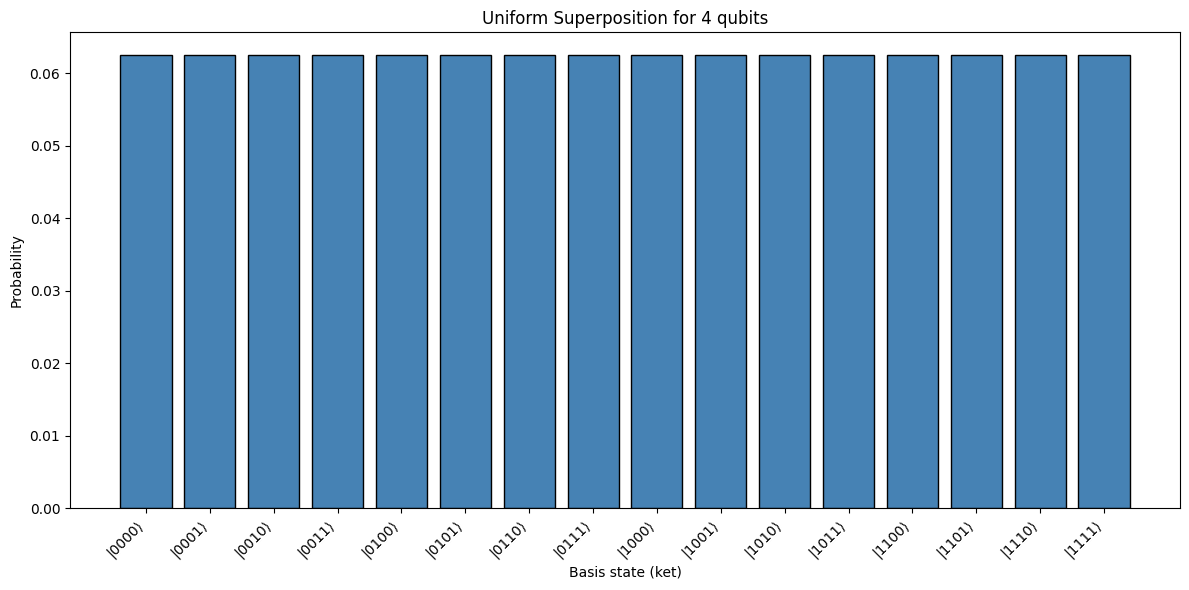

In [332]:
# Run the circuit
probs = naive_circuit()

# Plot with the new function
plot_probabilities(probs, 4, title="Uniform Superposition for 4 qubits")

---
---

## Measurements in PennyLane (1)
https://pennylane.ai/codebook/pennylane-fundamentals/measurements-in-pennylane

In [333]:
# Samples

dev = qml.device("default.qubit", wires = 1, shots = 20)

@qml.qnode(dev)
def circuit():
    qml.Hadamard(wires = 0)
    return qml.sample()
print(circuit())

[0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0]


In [334]:
# Counts

dev = qml.device("default.qubit", wires = 2, shots = 1000)

@qml.qnode(dev)
def circuit_counts():
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    return qml.counts()
print(circuit_counts())

{np.str_('00'): np.int64(237), np.str_('01'): np.int64(255), np.str_('10'): np.int64(266), np.str_('11'): np.int64(242)}


In [335]:
# Probabilities

dev = qml.device("default.qubit", wires = 2) # No shots means analytical calculation

@qml.qnode(dev)
def simple_circuit():

    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)

    return qml.probs() # Computational basis measurement

In [336]:
simple_circuit()

array([0.25, 0.25, 0.25, 0.25])

In [337]:
# State

dev = qml.device("default.qubit", wires = 2) # No shots means analytical calculation

@qml.qnode(dev)
def simple_circuit():

    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)

    return qml.state() # Computational basis measurement

In [338]:
simple_circuit()

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

In [339]:
sy.Matrix(simple_circuit())

Matrix([
[0.5],
[0.5],
[0.5],
[0.5]])

In [340]:
print_state_ket(simple_circuit())

|ψ⟩ = (+0.500+0.000j)|00⟩ +
    (+0.500+0.000j)|01⟩ +
    (+0.500+0.000j)|10⟩ +
    (+0.500+0.000j)|11⟩


## Subcircuits & qml.specs()
Quantum functions that do not return anything can be used as subcircuits—smaller pieces that build up to a larger circuit.

https://pennylane.ai/codebook/pennylane-fundamentals/circuits-and-qnodes

https://docs.pennylane.ai/en/stable/code/api/pennylane.specs.html

In [341]:
def subcircuit_1(angle):

    qml.RX(angle, wires = 0)
    qml.PauliY(wires = 1)
    qml.CZ(wires = [0,1])

In [342]:
def subcircuit_2():

    qml.Hadamard(wires = 0)
    qml.CNOT(wires = [0,1])
    qml.SWAP(wires = [0,1])

In [343]:
def full_circuit(theta, phi):

    subcircuit_1(theta)
    qml.Barrier()
    subcircuit_2()
    qml.Barrier()
    subcircuit_1(phi)

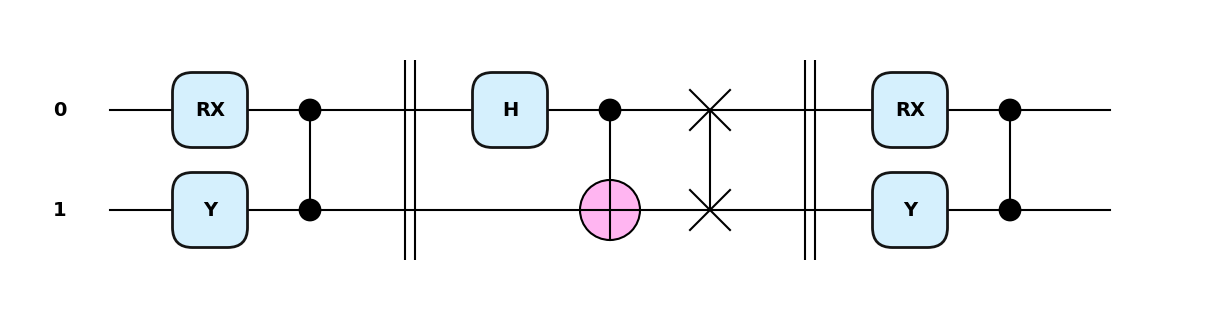

In [344]:
theta = 0.3
phi = 0.2

draw_mpl(full_circuit , style="pennylane" )(theta,phi);

In [345]:
specs_func = qml.specs(full_circuit)

In [346]:
# Turn into a QNode
qnode = qml.QNode(full_circuit, dev)

# --- See circuit specs ---
info = qml.specs(qnode)(0.3, 0.2)  # example inputs
print(info)

{'resources': Resources(num_wires=2, num_gates=11, gate_types=defaultdict(<class 'int'>, {'RX': 2, 'PauliY': 2, 'CZ': 2, 'Barrier': 2, 'Hadamard': 1, 'CNOT': 1, 'SWAP': 1}), gate_sizes=defaultdict(<class 'int'>, {1: 5, 2: 4, 0: 2}), depth=9, shots=Shots(total_shots=None, shot_vector=())), 'errors': {}, 'num_observables': 0, 'num_trainable_params': 0, 'num_device_wires': 2, 'num_tape_wires': 2, 'device_name': 'default.qubit', 'level': 'gradient', 'gradient_options': {}, 'interface': 'auto', 'diff_method': 'best', 'gradient_fn': 'backprop'}


## Controlled-Unitaries
https://pennylane.ai/codebook/pennylane-fundamentals/quantum-operations

In [347]:
# qml.ctrl : If the gate  exists as a PennyLane operator, we can use the qml.ctrl function

dev = qml.device("default.qubit", wires = 2)

@qml.qnode(dev)
def controlled_gate_circuit(angle):
   qml.Hadamard(0)
   qml.ctrl(qml.RX, control = (0), control_values=(1))(angle, wires=[1])
   qml.Hadamard(0)
   qml.ctrl(qml.RX, control = (1), control_values=(0))(angle, wires=[0])
   # Controlled RX
   return qml.state()

In [348]:
controlled_gate_circuit(0.3)

array([0.98321966-0.00083901j, 0.        -0.07471907j,
       0.00555142-0.14859912j, 0.        +0.07471907j])

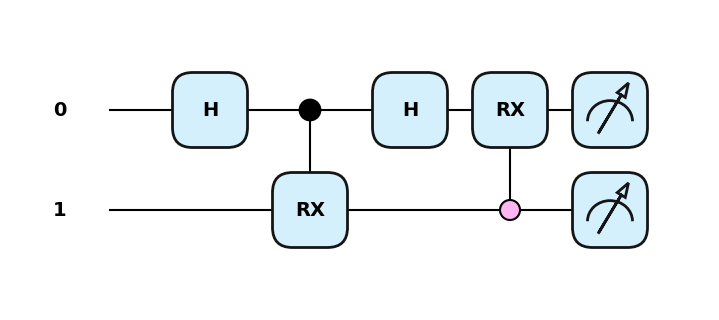

In [349]:
draw_mpl(controlled_gate_circuit , style="pennylane" )(0.3);

---
---
### qml.ControlledQubitUnitary : If, instead, we are given the matrix  of the controlled unitary to be applied, we can use qml.ControlledQubitUnitary

In [350]:
U = np.array([[ 0.94877869,  0.31594146], [-0.31594146,  0.94877869]])
U

array([[ 0.94877869,  0.31594146],
       [-0.31594146,  0.94877869]])

In [351]:
dev = qml.device("default.qubit", wires = 4)

U =[[ 0.94877869,  0.31594146], [-0.31594146,  0.94877869]]

@qml.qnode(dev)
def circuit_controlled_unitary():

  qml.Hadamard(wires = 1)
  qml.ControlledQubitUnitary(U, wires=[0, 1, 3 ,2], control_values=[1, 0, 1])
  return qml.state()

print(circuit_controlled_unitary())

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j]


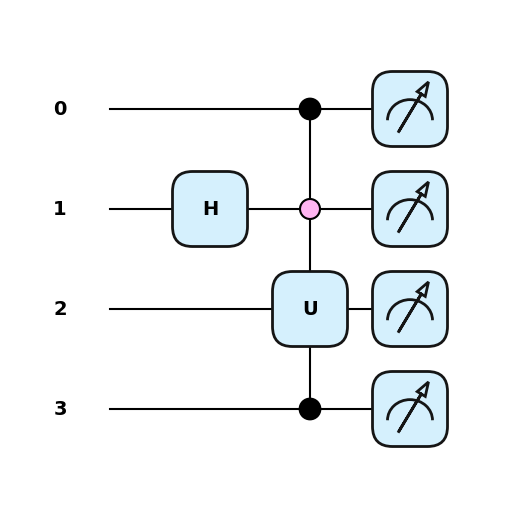

In [352]:
draw_mpl(circuit_controlled_unitary , style="pennylane" )();

## Quantum Teleportation
https://pennylane.ai/qml/demos/tutorial_teleportation

https://quantum.country/teleportation
<br>

Quantum state preparation
https://pennylane.ai/codebook/pennylane-fundamentals/quantum-operations
qml.StatePrep    
<br>
qml.cond(condition, op)(*args) applies the quantum operation "op"
only if the given classical measurement condition is satisfied.
https://docs.pennylane.ai/en/stable/code/api/pennylane.cond.html#pennylane.cond   

In [353]:
dev = qml.device("default.qubit", wires=["S", "A", "B"])

In [354]:
# state_preparation puts Alice’s source qubit S in the unknown state

def state_preparation(state):
    qml.StatePrep(state, wires=["S"])

In [355]:
# entangle_qubits creates an EPR pair between A and B (H on A, then CNOT A→B).

def entangle_qubits():
    qml.Hadamard(wires="A")
    qml.CNOT(wires=["A", "B"])

In [356]:
# basis_rotation performs the Bell-basis measurement step on S and A (CNOT S→A, H on S).

def basis_rotation():
    qml.CNOT(wires=["S", "A"])
    qml.Hadamard(wires="S")

In [357]:
# measure_and_update measures S and A, then applies the classical corrections on B:
# apply X if  𝑚1 = 1 and Z if 𝑚0 = 1.

def measure_and_update():
    m0 = qml.measure("S")
    m1 = qml.measure("A")
    qml.cond(m1, qml.PauliX)("B")
    qml.cond(m0, qml.PauliZ)("B")

In [358]:
@qml.qnode(dev)

def teleport(state):
    state_preparation(state)
    qml.Barrier()
    entangle_qubits()
    qml.Barrier()
    basis_rotation()
    qml.Barrier()
    measure_and_update()

In [359]:
state = np.array([1 / np.sqrt(2) + 0.3j, 0.4 - 0.5j])
sy.Matrix(state)

Matrix([
[0.707106781186547 + 0.3*I],
[              0.4 - 0.5*I]])

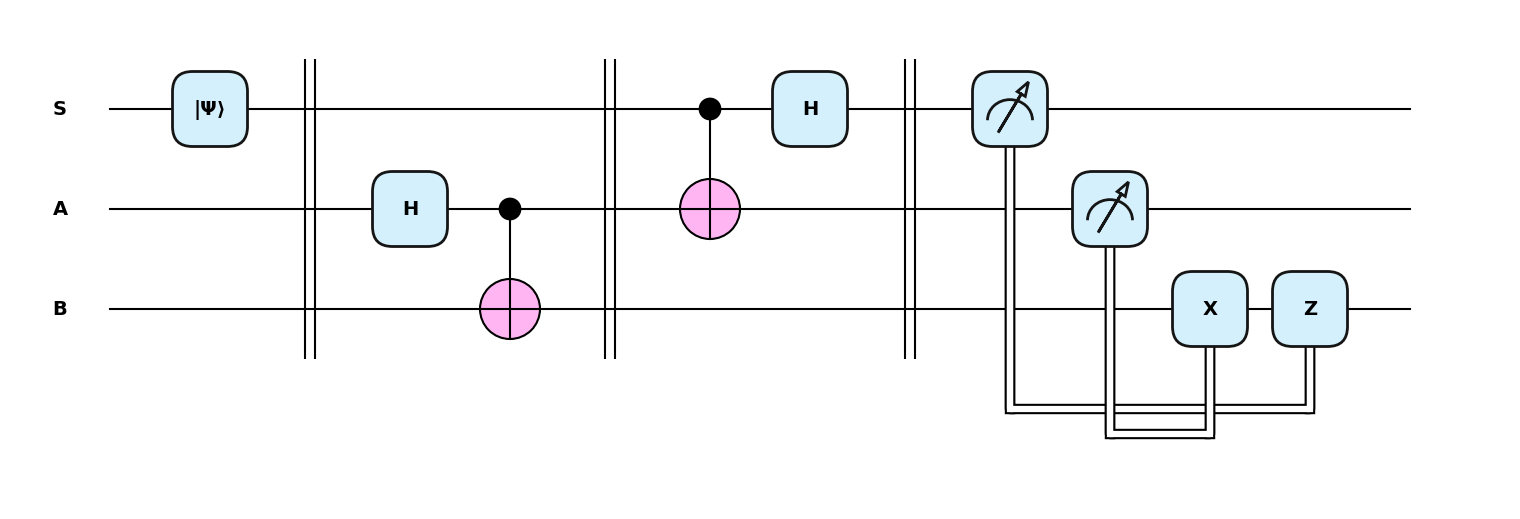

In [360]:
_ = qml.draw_mpl(teleport, style="pennylane")(state)

In [361]:
norm = np.linalg.norm(state)

print("Norm:", norm)
print("Is normalized?", np.isclose(norm, 1.0))
print()
# Probabilities = squared magnitudes
probs = np.abs(state)**2

print("Probabilities:", probs)
print("Sum:", np.sum(probs))  # should be 1.0
print("Sum:", round(np.sum(probs), 5))   # rounded to 5 decimals

Norm: 0.9999999999999999
Is normalized? True

Probabilities: [0.59 0.41]
Sum: 0.9999999999999998
Sum: 1.0


### Density Matrix
https://docs.pennylane.ai/en/stable/code/api/pennylane.density_matrix.html

https://pennylane.ai/codebook/noisy-quantum-theory

### Fidelity

https://pennylane.ai/codebook/distance-measures/fidelity

https://docs.pennylane.ai/en/stable/code/api/pennylane.math.fidelity.html

In [362]:
@qml.qnode(dev)

def teleport_and_get_B(state):
    state_preparation(state)
    entangle_qubits()
    basis_rotation()
    measure_and_update()
    return qml.density_matrix("B")   # Bob’s final state ρ_B
    # return qml.state(wires="B")

In [363]:
bob_state = teleport_and_get_B(state)
bob_state

array([[0.59      +0.j        , 0.13284271+0.47355339j],
       [0.13284271-0.47355339j, 0.41      +0.j        ]])

In [364]:
sy.Matrix(bob_state)

Matrix([
[                                   0.59, 0.132842712474619 + 0.473553390593274*I],
[0.132842712474619 - 0.473553390593274*I,                                    0.41]])

In [365]:
# Test with our example state
state = np.array([1/np.sqrt(2) + 0.3j, 0.4 - 0.5j])

In [366]:
sy.Matrix(state)

Matrix([
[0.707106781186547 + 0.3*I],
[              0.4 - 0.5*I]])

In [367]:
state_dm = qml.math.dm_from_state_vector(state)
state_dm

array([[0.59      +0.j        , 0.13284271+0.47355339j],
       [0.13284271-0.47355339j, 0.41      +0.j        ]])

In [368]:
sy.Matrix(state_dm)

Matrix([
[                                   0.59, 0.132842712474619 + 0.473553390593274*I],
[0.132842712474619 - 0.473553390593274*I,                                    0.41]])

In [369]:
# Fidelity between input |ψ> and Bob’s output
F = qml.math.fidelity(bob_state, state_dm)
print("Fidelity:", F)

Fidelity: 0.9999999999999998


### Deferred measurement (Quantum Teleportation)

https://en.wikipedia.org/wiki/Deferred_measurement_principle

By moving the measurement to the end, the 2-qubit controlled-X and controlled-Z gates need to be applied, which requires both qubits to be near (i.e. at a distance where 2-qubit quantum effects can be controlled), and thus limits the distance of the teleportation.   
While logically equivalent, deferring the measurement have physical implications.

Instead of using **classical communication** of measurement results to control local corrections, one must implement **additional quantum two-qubit gates** directly between Alice’s and Bob’s qubits.  
This effectively replaces , long-distance classical signals with, short-range quantum interactions.

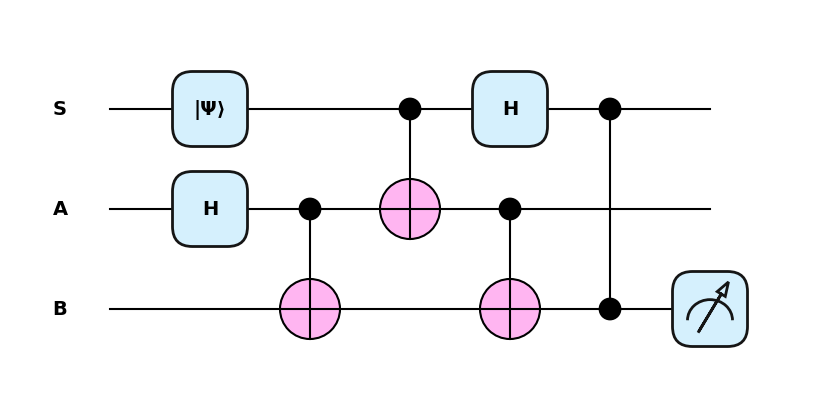

In [370]:
dev = qml.device("default.qubit", wires=["S", "A", "B"])

@qml.qnode(dev)
def teleport_d(state):
    state_preparation(state)
    entangle_qubits()
    basis_rotation()
    #qml.CNOT(wires=["A", "B"])  # X on B controlled by A
    #qml.CZ(wires=["S", "B"])    # Z on B controlled by S

    measure_and_update()
    return qml.density_matrix(wires=["B"])

_ = qml.draw_mpl(teleport_d, style="pennylane", level="device")(state)

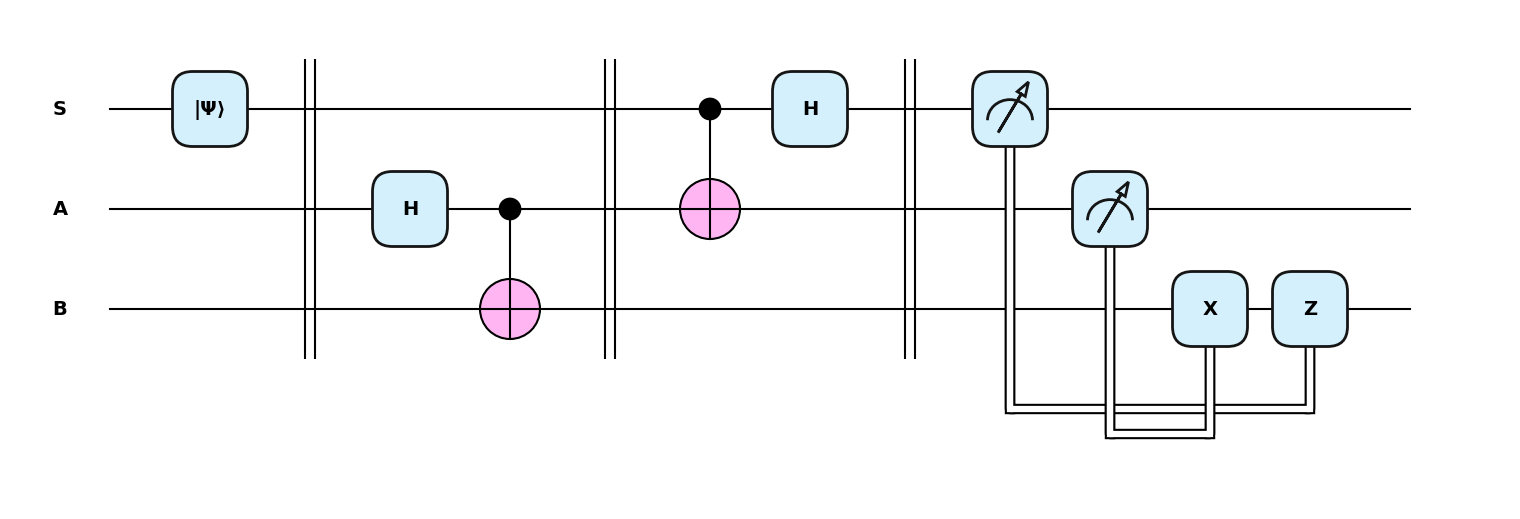

In [371]:
_ = qml.draw_mpl(teleport, style="pennylane")(state)

In [372]:
def teleport_state(state):
    teleported_density_matrix = teleport_d(state)
    original_density_matrix = qml.math.dm_from_state_vector(state)

    if not np.allclose(teleported_density_matrix, original_density_matrix):
        raise ValueError(
            f"Alice's state ({state}) not teleported properly. "
            f"Final density matrix of Bob's subsystem: {teleported_density_matrix}"
        )
    print("State successfully teleported!")


teleport_state(state)

State successfully teleported!


---
---

## Measurements in PennyLane (2): Expectation values & Observables

https://pennylane.ai/codebook/single-qubit-gates/what-did-you-expect

https://pennylane.ai/codebook/pennylane-fundamentals/measurements-in-pennylane


with shots = hardware-like sampling, without shots = exact simulation.

Codercise I.10.1 — Measurement of the PauliY observable

Codercise I.10.2 — Setting up the number of experiment shots

Codercise I.10.3 — Evaluating the samples

In [373]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def circuit():
    qml.RX(np.pi/4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    return qml.expval(qml.PauliY(0))

print(circuit())

-0.7071067811865471


In [374]:
# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

for shots in shot_values:
    # Create device with given number of shots
    dev = qml.device("default.qubit", wires=1, shots=shots)

    @qml.qnode(dev)
    def circuit():
        qml.RX(np.pi/4, wires=0)
        qml.Hadamard(wires=0)
        qml.PauliZ(wires=0)
        return qml.expval(qml.PauliY(0))

    # Run the circuit and store result
    shot_results.append(circuit())

print(qml.math.unwrap(shot_results))

[-0.46, -0.692, -0.6976, -0.7067, -0.706074]


In [375]:
dev = qml.device("default.qubit", wires=1, shots=100000)

@qml.qnode(dev)
def circuit():
    qml.RX(np.pi / 4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    # RETURN MEASUREMENT SAMPLES OF THE CORRECT OBSERVABLE
    return qml.sample(qml.PauliY(0))

def compute_expval_from_samples(samples):
    """Estimate ⟨Y⟩ from ±1 samples."""
    # For ±1 outcomes, the expectation value is just the mean
    estimated_expval = float(qml.math.sum(samples) / len(samples))
    return estimated_expval

samples = circuit()
print(compute_expval_from_samples(samples))


-0.71056


Codercise PF.3.2 — Hermitian observable

In [376]:
dev = qml.device("default.qubit", wires=2)

A = np.array([[1, 0], [0, -1]])

@qml.qnode(dev)
def circuit():
    """
    Prepare a Bell state and return ⟨A⟩ on the first qubit.
    """
    qml.H(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.Hermitian(A, wires=0))
print(circuit())

0.0


In [377]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit():
    """
    Prepare a Bell state and return the expectation value
    of the joint PauliZ ⊗ PauliZ observable.
    """
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])

    return qml.expval(qml.Z(wires=0) @ qml.Z(wires=1))


print(circuit())   # should output 1.0

0.9999999999999998


---
---
4 Bell sattes

In [378]:
def bell_pair(a, b):
    qml.Hadamard(wires=a)
    qml.CNOT(wires=[a, b])

In [379]:
def bell_phi_plus(a, b):
    """|Φ+> = (|00> + |11>)/√2"""
    bell_pair(a, b)

def bell_phi_minus(a, b):
    """|Φ-> = (|00> - |11>)/√2"""
    bell_pair(a, b)
    qml.PauliZ(wires=a)

def bell_psi_plus(a, b):
    """|Ψ+> = (|01> + |10>)/√2"""
    bell_pair(a, b)
    qml.PauliX(wires=a)

def bell_psi_minus(a, b):
    """|Ψ-> = (|01> - |10>)/√2"""
    bell_pair(a, b)
    qml.PauliX(wires=a)
    qml.PauliZ(wires=a)

In [380]:
bell_phi_plus

<function __main__.bell_phi_plus(a, b)>

In [381]:
bell_phi_minus

<function __main__.bell_phi_minus(a, b)>

In [382]:
bell_psi_plus

<function __main__.bell_psi_plus(a, b)>

In [383]:
bell_psi_minus

<function __main__.bell_psi_minus(a, b)>

## Entanglement Swapping

- **Initially:**
  - `A1` is entangled with `B`.
  - `C` is entangled with `A2`.
  - There is **no entanglement** between `B` and `C`.

- **After Alice’s local Bell measurement** on her qubits (`A1`, `A2`):
  - The entanglement is effectively **swapped**.
  - `B` and `C` become entangled, **even though they never interacted directly**.

This phenomenon is what we call **entanglement swapping**.

In [384]:
# Alice owns A1 and A2. Bob owns B. Charlie owns C.
wires = ["A1", "B", "C", "A2"]
dev = qml.device("default.qubit", wires=wires, shots=None)

def bell_pair(a, b):
    """Make a Bell pair between wires a and b: (|00>+|11>)/sqrt(2)."""
    qml.Hadamard(wires=a)
    qml.CNOT(wires=[a, b])
    qml.Barrier()

@qml.qnode(dev)
def entanglement_swapping():
    # 1) Prepare two Bell pairs:
    #    A1—B and C—A2. Alice shares one with Bob and one with Charlie.
    bell_pair("A1", "B")      # Bell(A1, B)
    bell_pair("A2", "C")      # Bell(A2, C)

    # 2) Alice performs a Bell-basis measurement on her two qubits A1 and A2.
    #    This is the "teleportation" step from A1 to C using A2 as the resource.
    qml.CNOT(wires=["A1", "A2"])
    qml.Hadamard(wires="A1")
    qml.Barrier()

    m1 = qml.measure("A1")    # classical bit c1
    m2 = qml.measure("A2")    # classical bit c2

    # 3) Alice sends the two classical bits (c1, c2) to Charlie.
    #    Charlie applies the usual teleportation corrections on C.
    #    If c2 = 1 apply X. If c1 = 1 apply Z.
    qml.cond(m2, qml.PauliX)("C")
    qml.cond(m1, qml.PauliZ)("C")

    # After the corrections, Bob's and Charlie's qubits are entangled.
    # Return their joint state to verify.
    return qml.density_matrix(wires=["B", "C"])

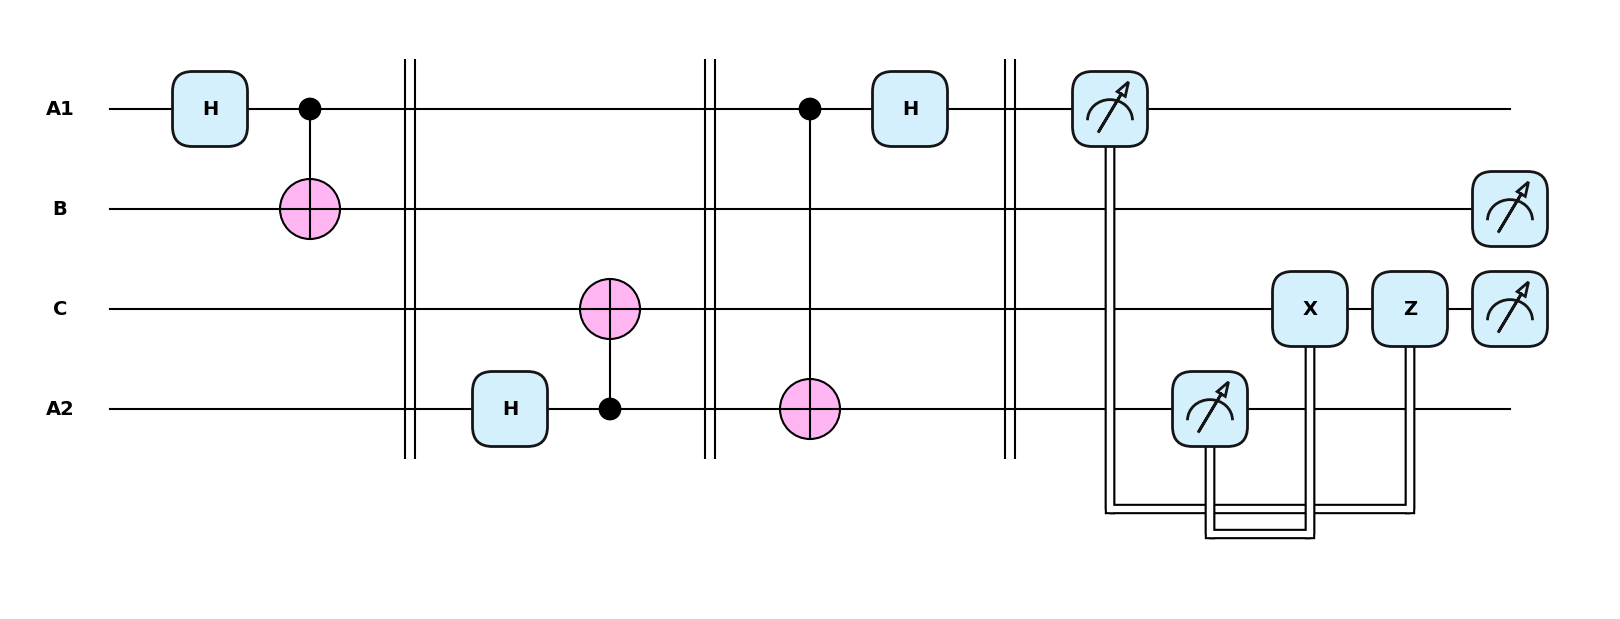

In [385]:
qml.draw_mpl(entanglement_swapping, style="pennylane")()
plt.show()

---
#### Compare with the Teleportation circuit

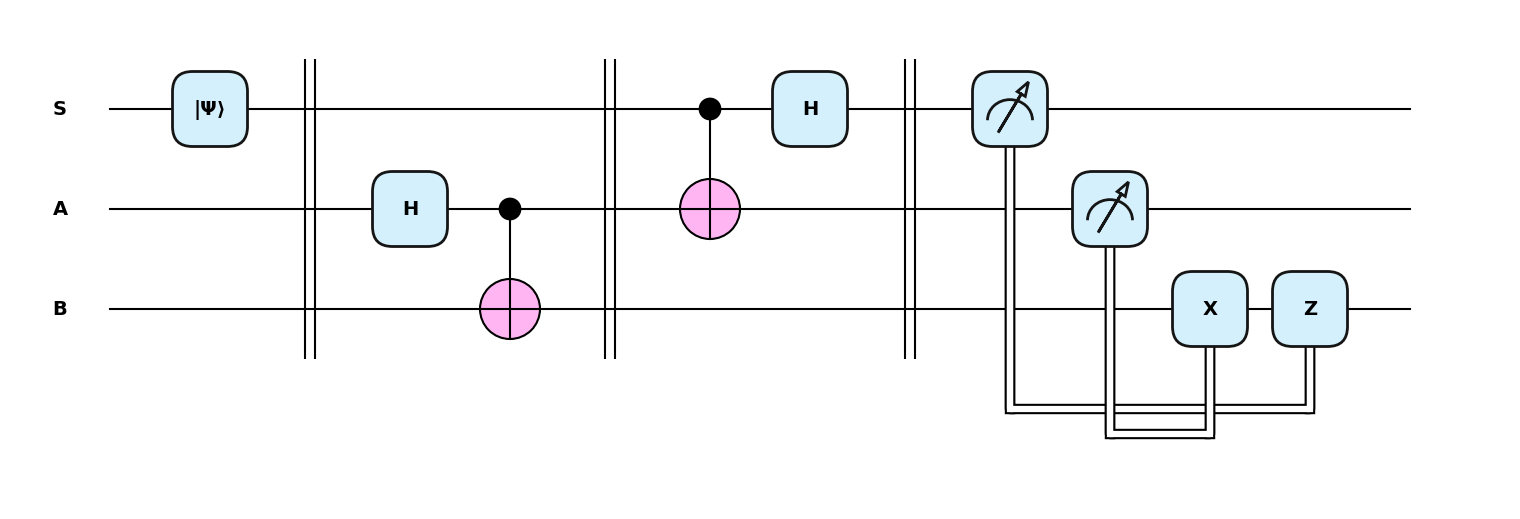

In [386]:
_ = qml.draw_mpl(teleport, style="pennylane")(state)

---
Let's check the Bob+ Charlie joint state

In [387]:
rho_BC = entanglement_swapping()
rho_BC

array([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
       [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]])

In [388]:
sy.Matrix(rho_BC)

Matrix([
[0.5, 0, 0, 0.5],
[  0, 0, 0,   0],
[  0, 0, 0,   0],
[0.5, 0, 0, 0.5]])

In [389]:
def entangle_qubits():
    qml.Hadamard(wires="A")
    qml.CNOT(wires=["A", "B"])

In [390]:
# Device with 2 qubits only: Bob and Charlie
dev_ref = qml.device("default.qubit", wires= 2)

@qml.qnode(dev_ref)
def bell_state_density():
    # Prepare Bell state |Φ+> = (|00>+|11>)/√2 between B and C
    qml.Hadamard(wires= 0)
    qml.CNOT(wires=[0 , 1])
    return qml.density_matrix(wires=[0 , 1])

In [391]:
sy.Matrix(bell_state_density())

Matrix([
[0.5, 0, 0, 0.5],
[  0, 0, 0,   0],
[  0, 0, 0,   0],
[0.5, 0, 0, 0.5]])

In [392]:
# Device with 2 qubits only: Bob and Charlie
dev_ref = qml.device("default.qubit", wires= 2)

@qml.qnode(dev_ref)
def bell_state_ket():
    # Prepare Bell state |Φ+> = (|00>+|11>)/√2 between B and C
    qml.Hadamard(wires= 0)
    qml.CNOT(wires=[0 , 1])
    return qml.state()

In [393]:
bell_state_ket()

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [394]:
sy.Matrix(bell_state_ket())

Matrix([
[0.707106781186547],
[                0],
[                0],
[0.707106781186547]])

In [395]:
sy.Matrix(qml.math.dm_from_state_vector(bell_state_ket()))

Matrix([
[0.5, 0, 0, 0.5],
[  0, 0, 0,   0],
[  0, 0, 0,   0],
[0.5, 0, 0, 0.5]])

In [396]:
sy.Matrix(np.outer(bell_state_ket(), bell_state_ket().conj()))

Matrix([
[0.5, 0, 0, 0.5],
[  0, 0, 0,   0],
[  0, 0, 0,   0],
[0.5, 0, 0, 0.5]])

### Deferred Measurement Approach in Entanglement Swapping

Instead of performing a **mid-circuit measurement** followed by **classically controlled corrections**, we can:

1. Apply the **Bell-basis rotation** on Alice’s qubits (`A1`, `A2`).  
2. Use the **post-rotation qubits** directly as quantum controls for Charlie’s corrections:  
   - `A1` controls a **Z** on Charlie’s qubit.  
   - `A2` controls an **X** on Charlie’s qubit.  
3. (Optionally) measure Alice’s qubits at the end.

This approach mirrors the classical procedure: the quantum controls on `A1` and `A2` behave exactly like the classical bits that would result from measuring them mid-circuit.  
If we trace out Alice’s qubits, Bob and Charlie are left entangled, just as in the measurement-based version.

---

### Why This is Called *Entanglement Swapping*

- **Initially:**  
  - `A1` is entangled with `B`.  
  - `C` is entangled with `A2`.  

- **After Alice’s Bell-basis measurement and sending her two classical bits to Charlie:**  
  - The entanglement is **swapped** to link `B` and `C`.  
  - Crucially, no direct quantum interaction between `B` and `C` was required.


In [397]:
wires = ["A1", "B", "C", "A2"]

dev = qml.device("default.qubit", wires=wires, shots=None)

def bell_pair(a, b):
    """Prepare (|00>+|11>)/√2 on wires a,b."""
    qml.Hadamard(wires=a)
    qml.CNOT(wires=[a, b])
    qml.Barrier()

@qml.qnode(dev)
def entanglement_swapping_d():
    # -- Resources: Alice shares Bell(A1,B) and Bell(A2,C) --
    bell_pair("A1", "B")      # Alice–Bob
    bell_pair("A2", "C")      # Alice–Charlie

    # -- Bell-basis rotation on Alice’s qubits (A1,A2) --
    #   (this is the same rotation used before the usual mid-circuit measurement)
    qml.CNOT(wires=["A1", "A2"])
    qml.Hadamard(wires="A1")
    qml.Barrier()

    # -- Deferred measurement principle --
    # Replace classical conditional corrections X^{m2} Z^{m1} on C
    # with quantum-controlled gates whose controls are A2 and A1, respectively.
    qml.CNOT(wires=["A2", "C"])  # applies X on C iff A2=1
    qml.CZ(wires=["A1", "C"])    # applies Z on C iff A1=1

    # (Optional) You could now measure A1,A2 at the end to read the same bits m1,m2.
    # We skip measuring because we only care about the entangled state of B and C.
    return qml.density_matrix(wires=["B", "C"])

# Example: draw or evaluate
# import matplotlib.pyplot as plt
# qml.draw_mpl(entanglement_swapping_d, style="pennylane")(); plt.show()
# rho_BC = entanglement_swapping_d()

(<Figure size 1400x500 with 1 Axes>, <Axes: >)

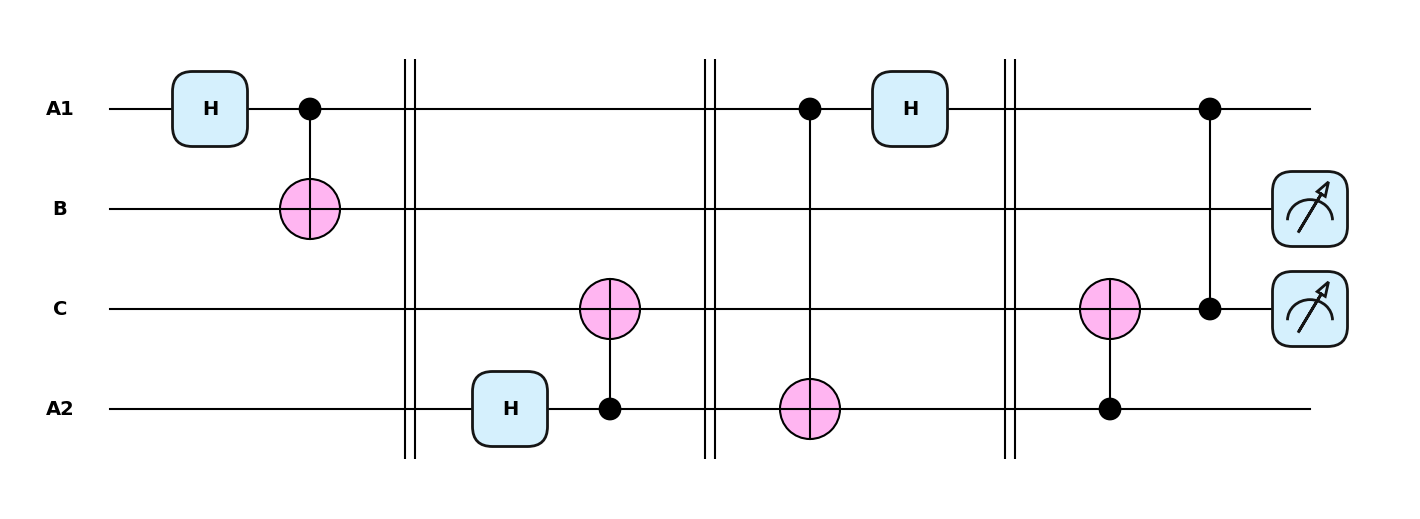

In [398]:
qml.draw_mpl(entanglement_swapping_d, style="pennylane")()
# plt.show()

# _ = qml.draw_mpl(teleport, style="pennylane")(state)

---
---

---
---